In [13]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 2.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
NER = spacy.load("en_core_web_sm")

In [16]:
import os

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [17]:
all_books

[<DirEntry "Book 1 - The Philosopher's Stone.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt'>]

In [20]:
book = all_books[1]
book_text = open(book, encoding="utf8").read()
book_doc = NER(book_text)

In [21]:
displacy.render(book_doc[0:2000], style="ent", jupyter=True )

In [23]:
character_df = pd.read_csv('characters.csv')

In [24]:
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [25]:
pd.set_option('display.max_rows', None)
character_df

,Unnamed: 0,book,character,character_firstname
0,0,Category:Deceased individuals,Giffard Abbott,Giffard
1,1,Category:Deceased individuals,Falco Aesalon,Falco
2,2,Category:Deceased individuals,Walter Aragon,Walter
3,3,Category:Deceased individuals,Podric Batworthy,Podric
4,4,Category:Deceased individuals,Angus Buchanan,Angus
5,5,Category:Deceased individuals,Zygmunt Budge,Zygmunt
6,6,Category:Deceased individuals,Henry Bumblepuft,Henry
7,7,Category:Deceased individuals,Elizabeth Burke,Elizabeth
8,8,Category:Deceased individuals,Cliodna,Cliodna
9,9,Category:Deceased individuals,Antonia Creaseworthy,Antonia


In [26]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [27]:
sent_entity_df

,sentence,entities
0,"(\n, J, .)",[]
1,"(K, .)",[]
2,"(R, O, W, L, !)",[]
3,"(N, G, \n\n, HARRY, \n\n, POTTER, \n\n\n\n\n, ...","[first, number four, Privet Drive]"
4,"(Mr., \n, Vernon, Dursley, had, been, woken, i...","[Vernon Dursley, the early hours]"
5,"(\n\n, “, Third, time, this, week, !, ”)","[Third, this week]"
6,"(he, roared, across, the, table, .)",[]
7,"(“, If, \n, you, ca, n’t, control, that, owl, ...",[]
8,"(\n\n, Harry, tried, ,, yet, again, ,, to, exp...",[]
9,"(\n\n, “, She, ’s, bored, ,, ”, he, said, .)",[]


In [29]:
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
           if ent in list(character_df.character)
           or ent in list(character_df.character_firstname)]

In [30]:
filter_entity(["Harry", "2"], character_df)

['Harry']

In [31]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
13,"(\n\n, He, exchanged, dark, looks, with, his, ...",[Petunia],[Petunia]
15,"(\n\n, Page, |, 2, Harry, Potter, and, the, Ch...",[Harry Potter],[Harry Potter]
17,"(,, ”, said, Aunt, \n, Petunia, ,, turning, mi...","[Aunt, Petunia]",[Petunia]
21,"(\n\n, “, Nonsense, ,, Petunia, ,, I, never, w...","[Petunia, Smeltings, Uncle Vernon]",[Petunia]
25,"(\n\n, “, You, ’ve, forgotten, the, magic, wor...",[Harry],[Harry]
27,"(\n\n, “, I, meant, ‘, please, ’, !, ”, said, ...",[Harry],[Harry]
30,"(\n\n\n\n, Page, |, 3, Harry, Potter, and, the...",[Harry Potter],[Harry Potter]
34,"(\n\n, “, All, right, ,, ”, said, Harry, ,, “,...",[Harry],[Harry]
35,"(\n\n, Uncle, Vernon, sat, back, down, ,, brea...",[Harry],[Harry]
36,"(\n\n, Ever, since, Harry, had, come, home, fo...","[Harry, the summer \nholidays, Uncle Vernon]",[Harry]


In [32]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8856\2127265797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [33]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
13,"(\n\n, He, exchanged, dark, looks, with, his, ...",[Petunia],[Petunia]
15,"(\n\n, Page, |, 2, Harry, Potter, and, the, Ch...",[Harry Potter],[Harry]
17,"(,, ”, said, Aunt, \n, Petunia, ,, turning, mi...","[Aunt, Petunia]",[Petunia]
21,"(\n\n, “, Nonsense, ,, Petunia, ,, I, never, w...","[Petunia, Smeltings, Uncle Vernon]",[Petunia]
25,"(\n\n, “, You, ’ve, forgotten, the, magic, wor...",[Harry],[Harry]
...,...,...,...
6564,"(\n\n, “, It, ’s, that, Ravenclaw, prefect, ,,...","[Ravenclaw, Penelope Clearwater, Ginny]",[Penelope]
6567,"(I, walked, in, on, them, kissing, in, an, emp...","[Harry Potter, one day]",[Harry]
6579,"(\n\n, “, Your, aunt, and, uncle, will, be, pr...",[Hermione],[Hermione]
6581,"(\n\n, “, Proud, ?, ”, said, Harry, .)",[Harry],[Harry]


In [34]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [35]:
relationship_df = pd.DataFrame(relationships)
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Petunia,Harry
1,Petunia,Harry
2,Petunia,Harry
3,Harry,Petunia
4,Petunia,Harry
5,Harry,Petunia
6,Harry,Petunia
7,Harry,Petunia
8,Petunia,Harry
9,Petunia,Harry


In [36]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Harry,Petunia
1,Harry,Petunia
2,Harry,Petunia
3,Harry,Petunia
4,Harry,Petunia
5,Harry,Petunia
6,Harry,Petunia
7,Harry,Petunia
8,Harry,Petunia
9,Harry,Petunia


In [37]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [38]:
relationship_df.head(10)

,source,target,value
0,Harry,Petunia,33
1,Harry,Hedwig,62
2,Harry,Hermione,343
3,Albus,Harry,19
4,Harry,Percy,125
5,Harry,Martin,6
6,Hermione,Percy,29
7,Harry,Lucius,25
8,Harry,Severus,8
9,Harry,Neville,48


In [42]:
!pip install scipy

     ---------------------------------------- 36.9/36.9 MB 2.3 MB/s eta 0:00:00


In [43]:
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

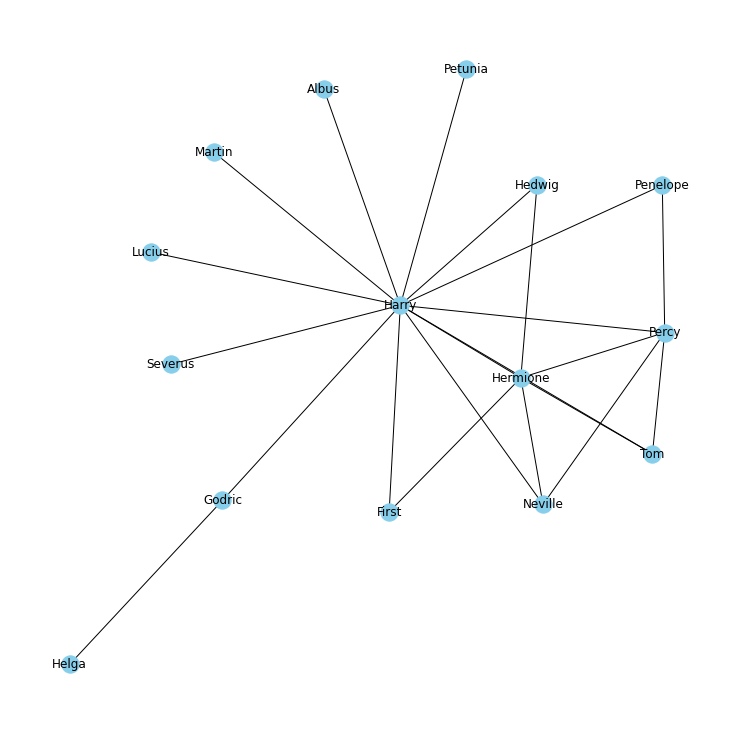

In [44]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [45]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

In [46]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Harry': 0.9285714285714285,
 'Petunia': 0.07142857142857142,
 'Hedwig': 0.14285714285714285,
 'Hermione': 0.42857142857142855,
 'Albus': 0.07142857142857142,
 'Percy': 0.3571428571428571,
 'Martin': 0.07142857142857142,
 'Lucius': 0.07142857142857142,
 'Severus': 0.07142857142857142,
 'Neville': 0.21428571428571427,
 'Godric': 0.14285714285714285,
 'Helga': 0.07142857142857142,
 'First': 0.14285714285714285,
 'Tom': 0.21428571428571427,
 'Penelope': 0.14285714285714285}

<AxesSubplot:>

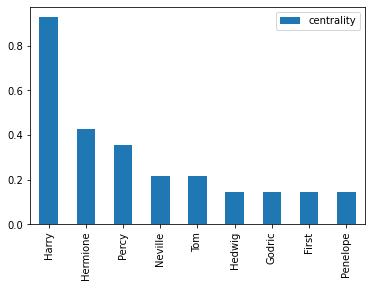

In [47]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

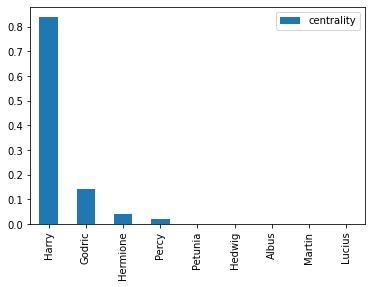

In [48]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

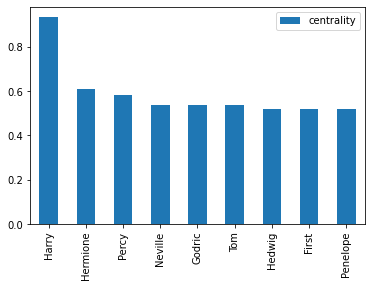

In [49]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [50]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')